# Introduction

- The main objective of the project is to implement supervised machine learning using regression analysis. For this, least squares and least mean squares are are used.
- The above mentioned practices are applied on the regression dataset(bike sharing dataset) and visualizations are to be done. 
- RMSE is computed to find out the error rate so that verification of results can be done.

# Data

## Description

1) The dataset consists of the bike sharing data with the following columns:
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 

  1: Clear, Few clouds, Partly cloudy, Partly cloudy
  
  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  
  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  
  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  
  
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

2) Source: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

# Reading the data

In [1]:
#To ignore the runtime warnings by the packages
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
hour = pd.read_csv("hour.csv")

In [3]:
hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12956,12957,2012-06-29,3,1,6,1,0,5,1,1,0.74,0.6667,0.51,0.1642,9,33,42
884,885,2011-02-09,1,0,2,8,0,3,1,1,0.10,0.1364,0.42,0.0000,1,198,199
3789,3790,2011-06-11,2,0,6,19,0,6,0,1,0.70,0.6515,0.65,0.1940,97,167,264
13916,13917,2012-08-08,3,1,8,1,0,3,1,1,0.72,0.6970,0.79,0.0000,3,20,23
5418,5419,2011-08-18,3,0,8,16,0,4,1,1,0.80,0.7273,0.46,0.3582,49,196,245


In [4]:
hour.shape

(17379, 17)

## Plots for understanding or analysis and preliminary observation

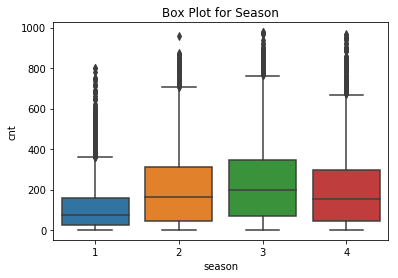

In [5]:
sns.boxplot(x='season',y='cnt', data=hour)
plt.title('Box Plot for Season')
plt.show()

### Observation

As the box plot suggests, the number of bike sharing users are more in summer (2) and fall (3). We can replate this in our real life as in bad weather riding bike is not preferred.

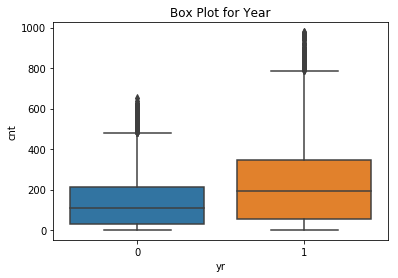

In [6]:
sns.boxplot(x='yr',y='cnt', data=hour)
plt.title('Box Plot for Year')
plt.show()

### Observation

From the box plot, we can analyze that number of users increased from year 2011 (0) to 2012 (1).

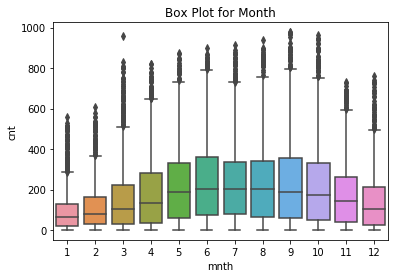

In [7]:
sns.boxplot(x='mnth',y='cnt', data=hour)
plt.title('Box Plot for Month')
plt.show()

### Observation

From the box plot, we can analyze that number of users are less during months which have colder conditions. (Here month 1-12  suggests Jan-Dec in that order).

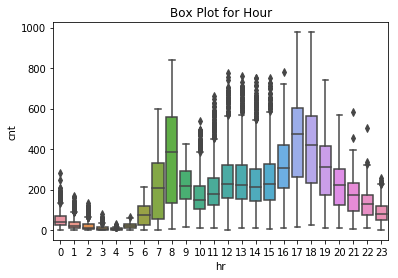

In [8]:
sns.boxplot(x='hr',y='cnt', data=hour)
plt.title('Box Plot for Hour')
plt.show()

### Observation

As the box plot suggests, we can analyze that more number of users are using bike sharing during office hours or rush hours.

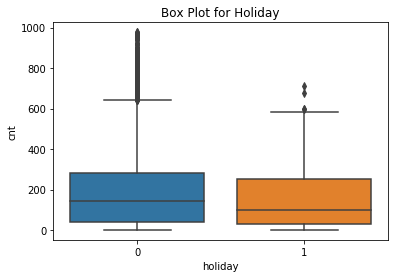

In [9]:
sns.boxplot(x='holiday',y='cnt', data=hour)
plt.title('Box Plot for Holiday')
plt.show()

### Observation

As the box plot suggests, we can analyze that more number of users are using bike sharing when it is not a holiday (0 indicates not a holiday).

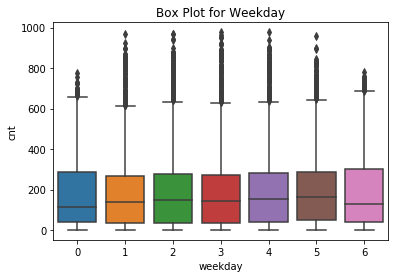

In [10]:
sns.boxplot(x='weekday',y='cnt', data=hour)
plt.title('Box Plot for Weekday')
plt.show()

### Observation

As the box plot suggests, we can analyze that more number of users are using bike sharing during days when offices and schools are open(by considering the median). Weekday(0-6) indicates the days of week in that order.

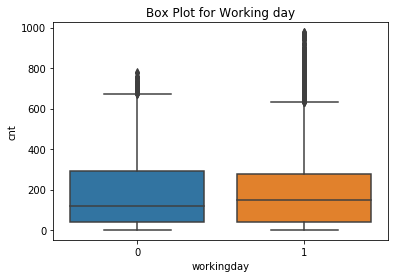

In [11]:
sns.boxplot(x='workingday',y='cnt', data=hour)
plt.title('Box Plot for Working day')
plt.show()

### Observation

As the box plot suggests, we can analyze that more number of users are using bike sharing when it is neither a weekend nor a holiday(1) by using the median for comparision

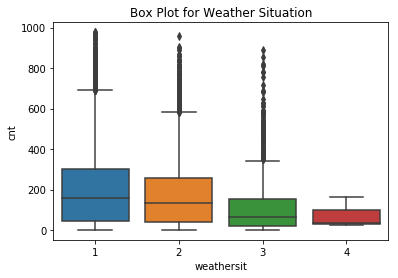

In [12]:
sns.boxplot(x='weathersit',y='cnt', data=hour)
plt.title('Box Plot for Weather Situation')
plt.show()

### Observation

 weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

As the box plot suggests, we can analyze that number of users are using bike sharing are reduced by deteriorating weather.

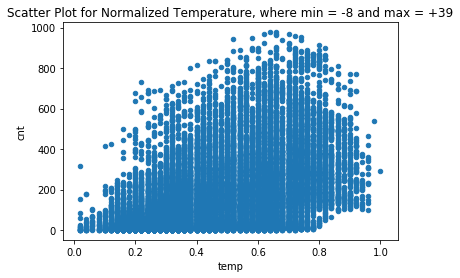

In [13]:
hour.plot(kind='scatter', x='temp', y='cnt') ;
plt.title('Scatter Plot for Normalized Temperature, where min = -8 and max = +39')
plt.show()

### Observation

As scatter plot suggests, the number of users are less when the temperature is extreme i.e., too hot or too cold.

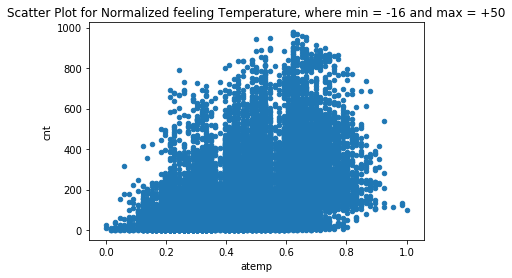

In [14]:
hour.plot(kind='scatter', x='atemp', y='cnt') ;
plt.title('Scatter Plot for Normalized feeling Temperature, where min = -16 and max = +50')
plt.show()

### Observation

As scatter plot suggests, the number of users are less when the feeling temperature is extreme i.e., too hot or too cold.

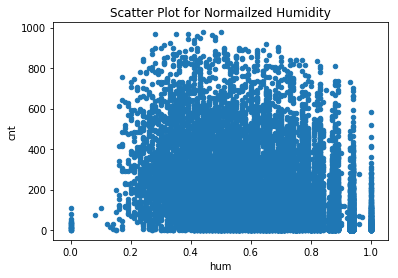

In [15]:
hour.plot(kind='scatter', x='hum', y='cnt') ;
plt.title('Scatter Plot for Normailzed Humidity')
plt.show()

### Observation

As scatter plot suggests, the number of users are less when the humidity is extreme is too low or when it increases to become high humidity.

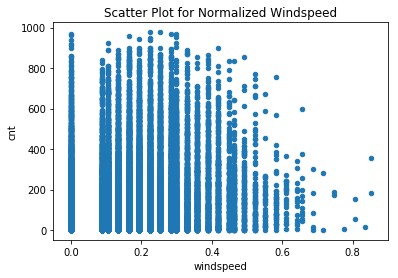

In [16]:
hour.plot(kind='scatter', x='windspeed', y='cnt') ;
plt.title('Scatter Plot for Normalized Windspeed')
plt.show()

### Observation

As scatter plot suggests, the number of users reduces with increase in windspeed.

## Preprocessing the data

In [17]:
#Checking if cnt != casual + regitered in any case
noise = hour[hour.casual+hour.registered!=hour.cnt]
print (noise)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


### Observation

As we can see, the sum of both casual and registered users gives the exact count as in database. So there is not noise or wrong values.

In [18]:
#Checking if there are any null values
hour.isnull().values.any()

False

### Observation

No null values are present in the dataset.

In [19]:
keep_col = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']
hour = hour[keep_col]
hour.sample(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
5173,3,0,8,11,0,1,1,1,0.82,0.7424,0.48,0.3582,179
7815,4,0,11,6,0,0,0,1,0.38,0.3939,0.82,0.1642,9
3516,2,0,5,10,0,2,1,1,0.82,0.7879,0.56,0.1343,109
11328,2,1,4,5,0,0,0,2,0.44,0.4394,0.77,0.2239,6
6625,4,0,10,15,0,6,0,1,0.66,0.6212,0.39,0.0000,496


In [20]:
hour.shape

(17379, 13)

### Observation

instant (unique number) and dteday (date) are not required in the analysis. So they are removed and not considered.

In [21]:
#Finding the correlation
correlation = hour.corr(method='pearson')
print (correlation)

              season        yr      mnth        hr   holiday   weekday  \
season      1.000000 -0.010742  0.830386 -0.006117 -0.009585 -0.002335   
yr         -0.010742  1.000000 -0.010473 -0.003867  0.006692 -0.004485   
mnth        0.830386 -0.010473  1.000000 -0.005772  0.018430  0.010400   
hr         -0.006117 -0.003867 -0.005772  1.000000  0.000479 -0.003498   
holiday    -0.009585  0.006692  0.018430  0.000479  1.000000 -0.102088   
weekday    -0.002335 -0.004485  0.010400 -0.003498 -0.102088  1.000000   
workingday  0.013743 -0.002196 -0.003477  0.002285 -0.252471  0.035955   
weathersit -0.014524 -0.019157  0.005400 -0.020203 -0.017036  0.003311   
temp        0.312025  0.040913  0.201691  0.137603 -0.027340 -0.001795   
atemp       0.319380  0.039222  0.208096  0.133750 -0.030973 -0.008821   
hum         0.150625 -0.083546  0.164411 -0.276498 -0.010588 -0.037158   
windspeed  -0.149773 -0.008740 -0.135386  0.137252  0.003988  0.011502   
cnt         0.178056  0.250495  0.1206

### Observation

No two different columns have correlation 1. Season and month have correlation 0.83(approx). As season has same month every time, the correlation is high.

Positive correlation implies that value of second column linearly increases with the increase in value of first column and negative correlation implies that value of second column linearly decreases with the increase in value of first column. This relation can be clearly identified in the dataset by comparing some values and checking if two columns are directly proportional or inversely proportional.

In [22]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
cnt           17379 non-null int64
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


### Observation

All values are appropriate.

In [23]:
#normalization
hour = (hour - hour.mean()) / (hour.max() - hour.min())
hour.sample(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
229,-0.500547,-0.502561,-0.503434,0.367533,-0.02877,-0.333947,0.317279,-0.141761,-0.343864,-0.309075,-0.127229,-0.030443,-0.118302
6475,0.499453,-0.502561,0.314748,-0.110728,-0.02877,-0.500614,-0.682721,-0.141761,-0.139783,-0.142475,0.132771,0.197605,-0.076294
12964,0.166120,0.497439,-0.048889,-0.110728,-0.02877,0.332720,0.317279,-0.141761,0.268380,0.221225,-0.077229,-0.030443,0.113255
5759,0.166120,-0.502561,0.223839,-0.067250,-0.02877,0.332720,0.317279,0.191572,0.145931,0.130325,0.132771,-0.030443,-0.050679
6998,0.499453,-0.502561,0.314748,-0.284641,-0.02877,-0.333947,0.317279,-0.141761,-0.119375,-0.081875,0.242771,-0.223460,-0.172606


# Method

## Review

### Linear Regression

- Linear regression is implemented in this project using Least Squares(LS) and Least Mean Squares(LMS).

- For both LS and LMS, train method is used to train data and use method is used to train data and get our expected results values.

### Least squares

- LS trains entire data at once. So when new data arrives, new data along with old data needed to be trained again.

- LS is computationally costly.

- The formula used in least squares is
$$
\begin{align}
\\
w &= \big(X^\top X\big)^{-1} X^\top t
\end{align}
$$


### Least Mean Squares

- Instead of using entire data, LMS is used in sequential or online learning when there is sufficiently large dataset.

- Hence LMS is computationally cheap.

- In online learning process, a data point is introduced one by one, and the parameters are updated.

- New estimation is made by using the updated parameters and steps are repeated.

- Initially w is guessed and then changed as it processes more data till it converges.
$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k 
$$, where k is steps for the repetition and Ek is the error for the k'th sample and α is a learning rate. This is called stochastic gradient descent or sequential gradient descent.

- The rule applied for each record is $$w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.$$

## Explanation of codes

### Super Classs Definition

In [24]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Explanation

- Super class definition is abstraact of the methods we try to implement i.e., LS and LMS. Both LS and LMS follow same outline as the super class. So this is just the outline sketch.


- The super class has init method which will initialize when a class instance is created.


- Check_matrix method checks if the matrix is a 2-D matrix.


- add_ones method adds column with ones to the matrix X.


- train method is used to train the data, i.e., calculating the weights.


- use method is used to apply the learned model to input X.

### Least Squares

In [25]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        N = X.shape[0]
        # TODO: code for finding w
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T
    
    # apply the learned model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        y = X1 @ self.w
        return y

### Explanation

- Least Squares has a class LinearRegress which has the following functions:

    init method which will initialize when a class instance is created.

    train method is used to train the data, i.e., calculating the weights.

    use method is used to apply the learned model to input X.

### Least Mean Squares

In [26]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for k in range(X.shape[0]):
            self.train_step(X[k,:],T[k])
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = np.hstack((np.ones(1),x))
        N = x.shape[0]
        if(self.w is None):
            self.w = np.zeros(N)
        y = self.w @ x
        self.w = self.w - self.alpha * (y - t) * x
            
    # apply the current model to data X
    def use(self, X):
        X1 = np.hstack((np.ones((X.shape[0], 1)), X.reshape((X.shape[0], -1))))
        y = X1 @ self.w
        y = np.array(y)[np.newaxis]
        return y.T

### Explanation

- Least Mean Squares has a class LinearRegress which has the following functions:

    init method which will initialize when a class instance is created.
    
    train method is used for batch training i.e., passing all the data to the LMS class at once. This method will inturn call train_step method.

    train_step method is used to train the data, i.e., calculating the weights.

    use method is used to apply the learned model to input X.

## Preliminary Test

In [27]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]

#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1:
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )

training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


## Usage Examples

In [28]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

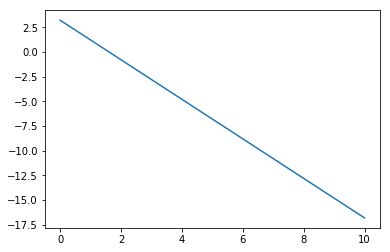

In [29]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

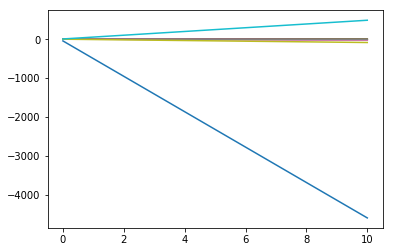

In [30]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

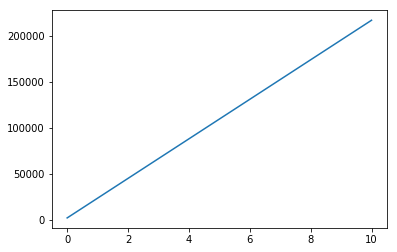

In [31]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

### Least Squares

RMSE:  3.09704886551744e-17


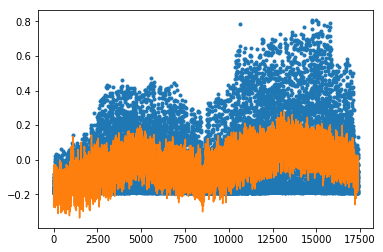

In [32]:
X = np.array([hour['season'],hour['yr'],hour['mnth'],hour['hr'],hour['holiday'],hour['weekday'],hour['workingday'],hour['weathersit'],hour['temp'],hour['atemp'],hour['hum'],hour['windspeed']])
X = np.transpose(X)
T = np.array(hour['cnt'])
T = np.reshape(T,(T.shape[0],1))
Tlog = np.log(T + 1)

LS = LinearRegress()

LS.train(X,Tlog)

Y= LS.use(X)
    
plt.plot(hour['cnt'][:T.shape[0]], '.')
plt.plot(Y)

print("RMSE: ",np.sqrt(np.mean(Tlog - Y)**2))

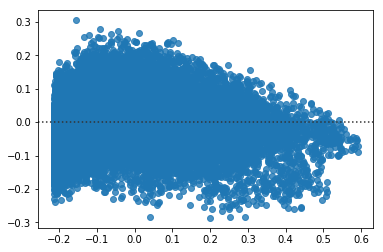

In [33]:
#Residual plot
sns.residplot(Tlog, Y)

### Observations

- The random pattern in residual plot indicates that a linear model provides a decent fit to the data.

- Entire data must be trained at once using Least Squares method. Adding new data is difficult as entire data(old + new) must be trained again.

## Description

- X contains the features for training the data and T contains the target values.

- Both features and target values are passed to train function find the weights.

- Only features are passed to the use function to compute predicted target values i.e., Y.

- Finally RMSE is computed to find the error rate. If the error rate is low, then the method followed is correct.

- As we can see, the error rate is very low. So we can say that the LS predicted values well.

## Least Mean Squares

RMSE:  0.014979678960992546


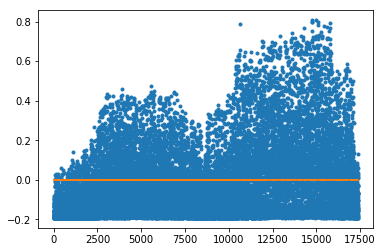

In [34]:
X = np.array([hour['season'],hour['yr'],hour['mnth'],hour['hr'],hour['holiday'],hour['weekday'],hour['workingday'],hour['weathersit'],hour['temp'],hour['atemp'],hour['hum'],hour['windspeed']])
X = np.transpose(X)
T = np.array(hour['cnt'])
T = np.reshape(T,(T.shape[0],1))
    
lms = LMS(0.000002)

Tlog = np.log(T + 1)

lms.train(X,Tlog)

Y= lms.use(X)
    
plt.plot(hour['cnt'][:T.shape[0]], '.')
plt.plot(Y)

print("RMSE: ",np.sqrt(np.mean(Tlog - Y)**2))

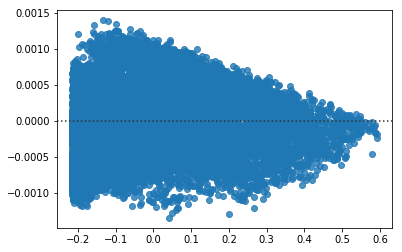

In [35]:
#Residual plot
sns.residplot(Tlog, Y)

RMSE:  0.01549063013585681


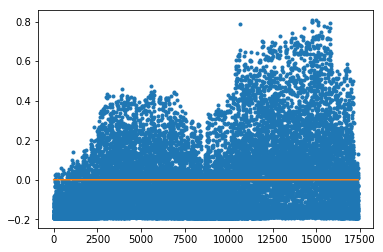

In [36]:
X = np.array([hour['season'],hour['yr'],hour['mnth'],hour['hr'],hour['holiday'],hour['weekday'],hour['workingday'],hour['weathersit'],hour['temp'],hour['atemp'],hour['hum'],hour['windspeed']])
X = np.transpose(X)
T = np.array(hour['cnt'])
T = np.reshape(T,(T.shape[0],1))
Tlog = np.log(T + 1)

lms = LMS(0.00000002)

lms.train(X,Tlog)

Y= lms.use(X)
    
plt.plot(hour['cnt'][:T.shape[0]], '.')
plt.plot(Y)
print("RMSE: ",np.sqrt(np.mean(Tlog - Y)**2))

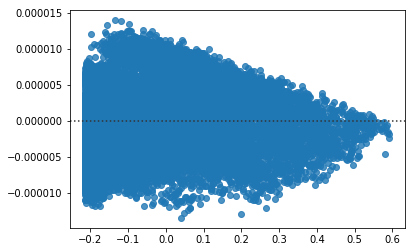

In [37]:
#Residual plot
sns.residplot(Tlog, Y)

RMSE:  0.002694461482490183


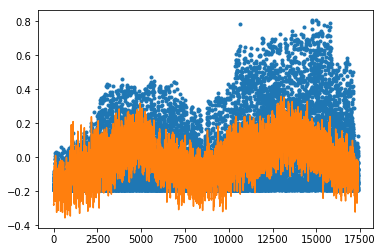

In [38]:
X = np.array([hour['season'],hour['yr'],hour['mnth'],hour['hr'],hour['holiday'],hour['weekday'],hour['workingday'],hour['weathersit'],hour['temp'],hour['atemp'],hour['hum'],hour['windspeed']])
X = np.transpose(X)
T = np.array(hour['cnt'])
T = np.reshape(T,(T.shape[0],1))
Tlog = np.log(T + 1)  
lms = LMS(0.02)

lms.train(X,Tlog)

Y= lms.use(X)
    
plt.plot(hour['cnt'][:T.shape[0]], '.')
plt.plot(Y)
print("RMSE: ",np.sqrt(np.mean(Tlog - Y)**2))

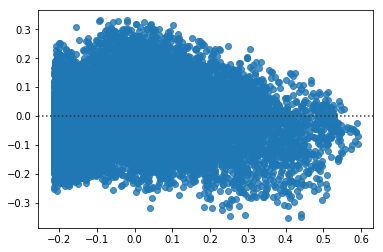

In [39]:
#Residual plot
sns.residplot(Tlog, Y)

### Observation

 - The random pattern in residual plots indicates that a linear model provides a decent fit to the data.
 
 
- As we can see, the error rates is very low. So we can say that the LS predicted values well.


- Different alpha values are tried above to show that an optimal value of alpha must be tried. If alpha is increased or decreased from the optimal value, the error rate will increase. As we can see the following errors for their corresposding values.
    
    RMSE:  0.03579790141913705 for alpha = 0.02
    
    RMSE:  0.014989112190726883 for alpha = 0.000002
    
    RMSE:  0.015490631100534504 for alpha = 0.00000002

## Description

- X contains the features for training the data and T contains the target values.


- Both features and target values are passed to train function find the weights.


- train function in turn calls train step function and the weights are calculated.


- Only features are passed to the use function to compute predicted target values i.e., Y.


- Finally RMSE is computed to find the error rate. If the error rate is low, then the method followed is correct.    

## Analysis / comparison of algorithms

- In Least Squares, the entire data must be processed for finding the weights.


- In Least Mean Squares, data is introduced point by point using train_step function.


- Learning rate is not a standard one i.e., for each dataset, optimal learning rate(alpha) must be found.


- LMS is very useful for online learning but for batch learning, LS is best.


- Normalization of dataset is giving better results for both LS and LMS.


- Matrix inversion is computation intensive process. Since it is being used in LS, it is computationally not so effective way of calculating weights.

# Conclusions

- By implementating the above techniques, I now understand which type of algorithms to select for batch and online learning.


- Implementation of LS is easy compared to LMS as I had to do some initializations, change the dimensions of final Y value i.e., target vector. Without changing the dimensions of Y value, LMS is failing.


- I better understand the learning rate used in the LMS approach after implementing the project.


- When features have different ranges, the normalization is used to make all the values in the dataset to a common scale.


- Residual plots helps to know if our dataset is suitable for linear model or we need to select non-linear model.

# References

[1] pydata.org. seaborn. (2012-2018) Retrieved from pydata.org website: https://seaborn.pydata.org/generated/seaborn.boxplot.html

[2] pydata.org. Plotting. (2012-2018) Retrieved from pydata.org website: http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html

[3] matplotlib.org. Pyplot tutorial. (2002 - 2012) Retrieved from matplotlib.org website: https://matplotlib.org/users/pyplot_tutorial.html

[4] stackoverflow.com. Normalize data in pandas. (2019) Retrieved from stackoverflow.com website: https://stackoverflow.com/questions/12525722/normalize-data-in-pandas

[5] Fanaee-T, Hadi., & Gama, Joao. Bike Sharing Dataset Data Set. (2013). Retrieved from uci.edu website: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

[6] Linear Model. (2019) Retrieved from uncc.edu website: https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Model.Sol.ipynb

[7] pydata.org. residplot. (2012-2018) Retrieved from pydata.org website: https://seaborn.pydata.org/generated/seaborn.residplot.html

# Extra Credits

## Most and least significant features of the data

In [40]:
#Finding the correlation
correlation = hour.corr(method='pearson')
print (correlation)

              season        yr      mnth        hr   holiday   weekday  \
season      1.000000 -0.010742  0.830386 -0.006117 -0.009585 -0.002335   
yr         -0.010742  1.000000 -0.010473 -0.003867  0.006692 -0.004485   
mnth        0.830386 -0.010473  1.000000 -0.005772  0.018430  0.010400   
hr         -0.006117 -0.003867 -0.005772  1.000000  0.000479 -0.003498   
holiday    -0.009585  0.006692  0.018430  0.000479  1.000000 -0.102088   
weekday    -0.002335 -0.004485  0.010400 -0.003498 -0.102088  1.000000   
workingday  0.013743 -0.002196 -0.003477  0.002285 -0.252471  0.035955   
weathersit -0.014524 -0.019157  0.005400 -0.020203 -0.017036  0.003311   
temp        0.312025  0.040913  0.201691  0.137603 -0.027340 -0.001795   
atemp       0.319380  0.039222  0.208096  0.133750 -0.030973 -0.008821   
hum         0.150625 -0.083546  0.164411 -0.276498 -0.010588 -0.037158   
windspeed  -0.149773 -0.008740 -0.135386  0.137252  0.003988  0.011502   
cnt         0.178056  0.250495  0.1206

- By finding the above correlation matrix, the features that are weakly correlated to count can be calculated. These are most significant features. Similarly the least significant features can also be found. A threshold must be taken and all the vaues with correlation >= threshold are least significant and < threshold are most significant features. So the feature which is least significant must be removed from the dataframe(need not be included in model).


- By taking the threshold as 0.25 in the above data, we get 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'windspeed' as most significant features. Similarly 'yr', 'hr', 'temp', 'atemp', 'hum' are least significant features.

## Consequences of removing most and least significant features from the model

- RMSE error will be increased if most significant features are removed from the model and only least significant features are used.

- RMSE error will be decreased if only most significant features are used in the model and least significant features are removed..

RMSE:  0.015496013969375217


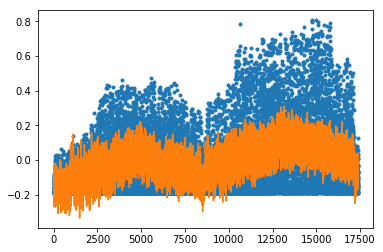

In [41]:
X = np.array([hour['season'],hour['yr'],hour['mnth'],hour['hr'],hour['holiday'],hour['weekday'],hour['workingday'],hour['weathersit'],hour['temp'],hour['atemp'],hour['hum'],hour['windspeed']])
X = np.transpose(X)
T = np.array(hour['cnt'])
T = np.reshape(T,(T.shape[0],1))
Tlog = np.log(T + 1)

LS = LinearRegress()

LS.train(X,T)

Y= LS.use(X)
    
plt.plot(hour['cnt'][:T.shape[0]], '.')
    
plt.plot(Y)

print("RMSE: ",np.sqrt(np.mean(Tlog - Y)**2))

RMSE:  0.015496013969375217


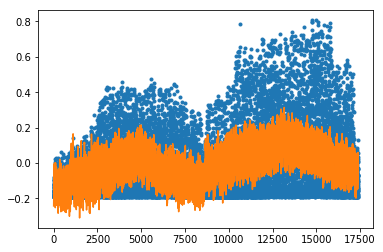

In [42]:
X = np.array([hour['yr'],hour['hr'],hour['temp'],hour['atemp'],hour['hum']])
X = np.transpose(X)
T = np.array(hour['cnt'])
T = np.reshape(T,(T.shape[0],1))
Tlog = np.log(T + 1)

LS = LinearRegress()

LS.train(X,T)

Y= LS.use(X)
    
plt.plot(hour['cnt'][:T.shape[0]], '.')
    
plt.plot(Y)

print("RMSE: ",np.sqrt(np.mean(Tlog - Y)**2))

RMSE:  1.9216012762946492e-17


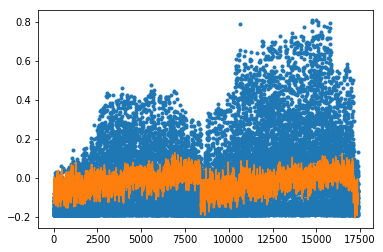

In [43]:
X = np.array([hour['season'],hour['mnth'],hour['holiday'],hour['weekday'],hour['workingday'],hour['weathersit'],hour['windspeed']])
X = np.transpose(X)
T = np.array(hour['cnt'])
T = np.reshape(T,(T.shape[0],1))
Tlog = np.log(T + 1)

LS = LinearRegress()

LS.train(X,Tlog)

Y= LS.use(X)
    
plt.plot(hour['cnt'][:T.shape[0]], '.')
plt.plot(Y)

print("RMSE: ",np.sqrt(np.mean(Tlog - Y)**2))

### Observation

As we can see the RMSE error is reduced when the most significant bits in the model and it is increased when least significant items are only used in the model.